### Sudipa Koner

#### Dataset_used : covid_19_india.csv

References :
1. https://matplotlib.org/stable/tutorials/colors/colormaps.html
2. https://seaborn.pydata.org/tutorial/color_palettes.html
3. https://www.youtube.com/watch?v=DJofs2JyIVM&t=3322s&ab_channel=Simplilearn

### Step 1: Import Necessary Libraries

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

### Step 2: Load and Explore the Data

In [3]:
df1 = pd.read_csv("covid_19_india.csv")

In [4]:
df1.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [5]:
df1.shape

(18110, 9)

In [6]:
df1.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


# Step 3: Data Preprocessing

In [8]:
print(df1.isnull().sum())

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64


In [9]:
df1.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"], inplace = True,axis = 1)

In [10]:
df1.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


###  Convert 'Date' column to datetime format

In [11]:

df1['Date'] = pd.to_datetime(df1['Date'] ,  format='%Y-%m-%d')

# Sort the DataFrame by date
df1.sort_values(by='Date', inplace=True)

### Clean up state names

In [12]:

df1['State/UnionTerritory'] = df1['State/UnionTerritory'].str.replace('[*]', '').str.strip()


In [13]:
state_name_mapping = {
    'Karanataka': 'Karnataka',
    'Himanchal Pradesh': 'Himachal Pradesh',
    'Telengana' : 'Telangana'
}


In [14]:
df1['State/UnionTerritory'] = df1['State/UnionTerritory'].replace(state_name_mapping)


In [15]:
# Assuming df1 is your DataFrame 
df1.drop(df1[df1['State/UnionTerritory'] == 'Unassigned'].index, inplace=True)
df1.drop(df1[df1['State/UnionTerritory'] == 'Cases being reassigned to states'].index, inplace=True)
df1.drop(df1[df1['State/UnionTerritory'] == 'Dadra and Nagar Haveli and Daman and Diu'].index, inplace=True)

# Step 4: Exploratory Data Analysis

## A. Overall Trends

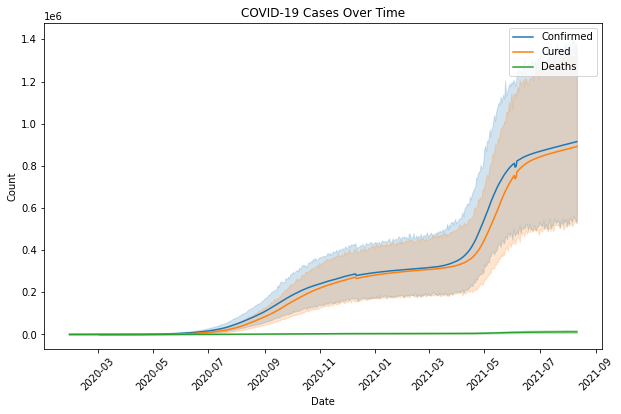

In [16]:
# Total cases over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Date', y='Confirmed', label='Confirmed')
sns.lineplot(data=df1, x='Date', y='Cured', label='Cured')
sns.lineplot(data=df1, x='Date', y='Deaths', label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## B. Active Cases

In [17]:
df1['Active_Cases'] = df1['Confirmed'] -(df1['Cured']+df1['Deaths'])

In [18]:
df1.tail(2)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18090,2021-08-11,Kerala,3396184,18004,3586693,172505
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


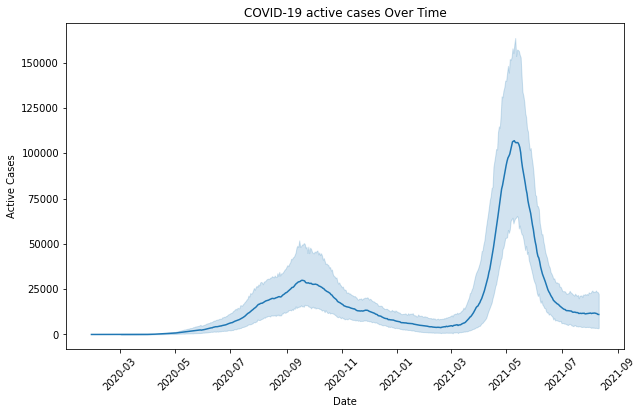

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Date', y='Active_Cases')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('COVID-19 active cases Over Time')
plt.xticks(rotation=45)
plt.show()

## C. Recovery_Rate

In [20]:
df1["Recovery_Rate"] = df1["Cured"]*100/df1["Confirmed"]

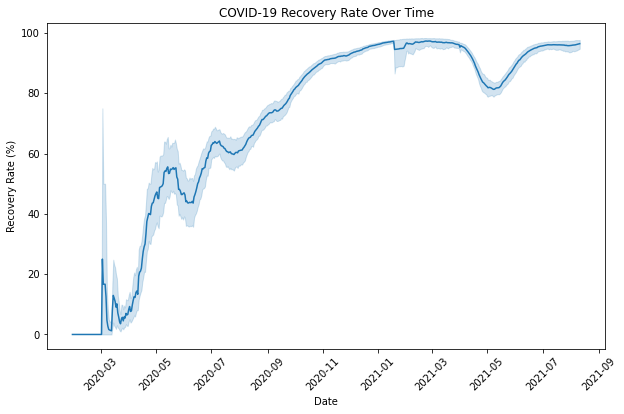

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Date', y='Recovery_Rate')
plt.xlabel('Date')
plt.ylabel('Recovery Rate (%)')
plt.title('COVID-19 Recovery Rate Over Time')
plt.xticks(rotation=45)
plt.show()

## D. Mortality Rate

In [22]:
df1["Mortality_Rate"] = df1["Deaths"]*100/df1["Confirmed"]

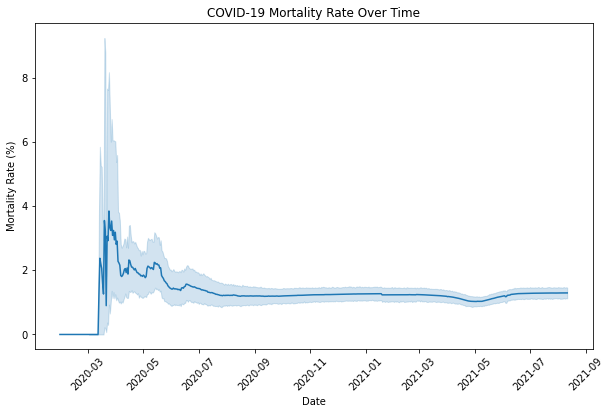

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Date', y='Mortality_Rate')
plt.xlabel('Date')
plt.ylabel('Mortality Rate (%)')
plt.title('COVID-19 Mortality Rate Over Time')
plt.xticks(rotation=45)
plt.show()

In [24]:
df1.head(5)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases,Recovery_Rate,Mortality_Rate
0,2020-01-30,Kerala,0,0,1,1,0.0,0.0
1,2020-01-31,Kerala,0,0,1,1,0.0,0.0
2,2020-02-01,Kerala,0,0,2,2,0.0,0.0
3,2020-02-02,Kerala,0,0,3,3,0.0,0.0
4,2020-02-03,Kerala,0,0,3,3,0.0,0.0


## E. State - wise Analysis

In [25]:
# Total cases by state
statewise = df1.groupby('State/UnionTerritory').agg({
    'Confirmed': 'max',
    'Cured': 'max',
    'Deaths': 'max'
}).reset_index()

### 1. Top 10 states with the highest confirmed cases


In [26]:
top_states = statewise.sort_values(by='Confirmed', ascending=False).head(10)

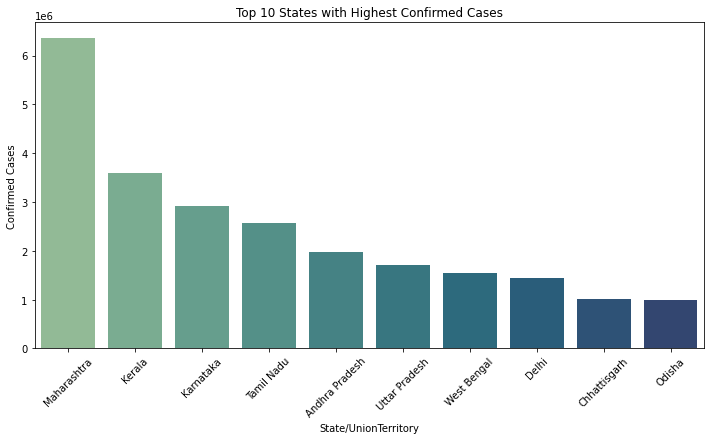

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='State/UnionTerritory', y='Confirmed', palette='crest')
plt.xticks(rotation=45)
plt.xlabel('State/UnionTerritory')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 States with Highest Confirmed Cases')
plt.show()

### 2. Top 10 states with the Highest deaths cases

In [28]:
top_states = statewise.sort_values(by='Deaths', ascending=False).head(10)

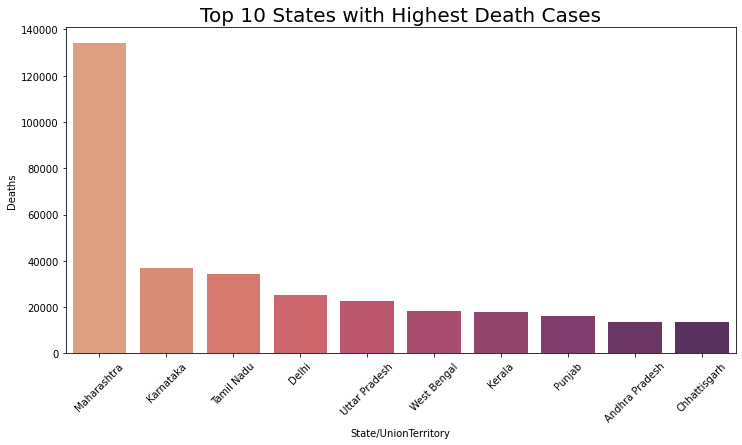

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='State/UnionTerritory', y='Deaths',palette='flare')
plt.xticks(rotation=45)
plt.xlabel('State/UnionTerritory')
plt.ylabel('Deaths')
plt.title('Top 10 States with Highest Death Cases',size = 20)
plt.show()

### 3. Top 10 states with the Highest Active Cases

In [30]:
statewise['Active_Cases'] = statewise['Confirmed'] - statewise['Cured'] - statewise['Deaths']


In [31]:
statewise.sort_values(by='Active_Cases', ascending=False).head(10)

,State/UnionTerritory,Confirmed,Cured,Deaths,Active_Cases
17,Kerala,3586693,3396184,18004,172505
21,Maharashtra,6363442,6159676,134201,69565
16,Karnataka,2921049,2861499,36848,22702
31,Tamil Nadu,2579130,2524400,34367,20363
1,Andhra Pradesh,1985182,1952736,13564,18882
24,Mizoram,46320,33722,171,12427
3,Assam,576149,559684,5420,11045
36,West Bengal,1534999,1506532,18252,10215
26,Odisha,988997,972710,6565,9722
32,Telangana,650353,638410,3831,8112


In [32]:
top_states = statewise.sort_values(by='Active_Cases', ascending=False).head(10)

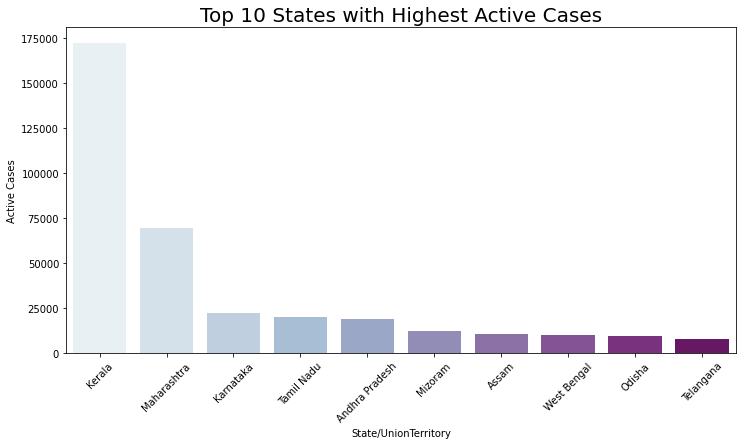

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='State/UnionTerritory', y='Active_Cases',palette='BuPu')
plt.xticks(rotation=45)
plt.xlabel('State/UnionTerritory')
plt.ylabel('Active Cases')
plt.title('Top 10 States with Highest Active Cases',size = 20)
plt.show()

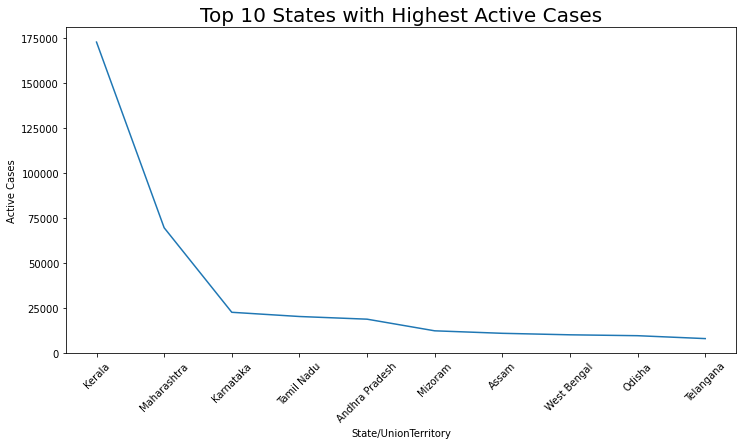

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_states, x='State/UnionTerritory', y='Active_Cases',palette='BuPu')
plt.xticks(rotation=45)
plt.xlabel('State/UnionTerritory')
plt.ylabel('Active Cases')
plt.title('Top 10 States with Highest Active Cases',size = 20)
plt.show()

### 4. Top 10 states with the Highest Mortality Rate

In [35]:
statewise["Mortality_Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]

In [36]:
# Sort the DataFrame by mortality rate in ascending order
statewise = statewise.sort_values(by='Mortality_Rate',ascending=True).head(10)
 

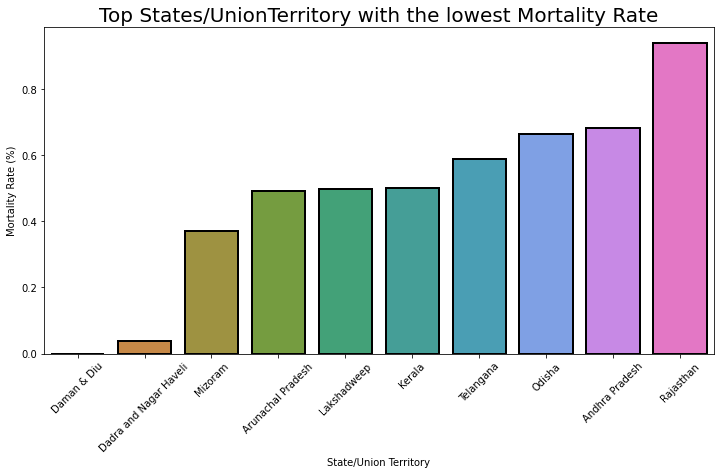

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=statewise, x="State/UnionTerritory", y="Mortality_Rate", linewidth = 2,edgecolor = 'black',palette= 'husl')
plt.xlabel('State/Union Territory')
plt.ylabel('Mortality Rate (%)')
plt.title('Top States/UnionTerritory with the lowest Mortality Rate',size = 20)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()
 